In [24]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets
from torchvision import transforms

import pathlib,PIL
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [33]:
data_dir = './P6好莱坞明星识别/48data/'
data_dir = pathlib.Path(data_dir)

In [39]:
data_paths = list(data_dir.glob('*'))
classnames = [data_paths[i].name for i in range(len(data_paths))]

In [45]:
train_transforms = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406], 
    std=[0.229, 0.224, 0.225])
])

In [46]:
total_data = datasets.ImageFolder('./P6好莱坞明星识别/48data/',transform = train_transforms)

In [47]:
total_data

Dataset ImageFolder
    Number of datapoints: 1800
    Root location: ./P6好莱坞明星识别/48data/
    StandardTransform
Transform: Compose(
               Resize(size=[224, 224], interpolation=bilinear)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [48]:
total_data.class_to_idx

{'Angelina Jolie': 0,
 'Brad Pitt': 1,
 'Denzel Washington': 2,
 'Hugh Jackman': 3,
 'Jennifer Lawrence': 4,
 'Johnny Depp': 5,
 'Kate Winslet': 6,
 'Leonardo DiCaprio': 7,
 'Megan Fox': 8,
 'Natalie Portman': 9,
 'Nicole Kidman': 10,
 'Robert Downey Jr': 11,
 'Sandra Bullock': 12,
 'Scarlett Johansson': 13,
 'Tom Cruise': 14,
 'Tom Hanks': 15,
 'Will Smith': 16}

In [50]:
train_size = int(0.8 * len(total_data))
test_size  = len(total_data) - train_size
train_dataset,test_dataset = torch.utils.data.random_split(total_data,[train_size,test_size])
train_dataset,test_dataset

(<torch.utils.data.dataset.Subset at 0x7fd78fad4b50>,
 <torch.utils.data.dataset.Subset at 0x7fd78fad4e10>)

In [53]:
train_dataset.dataset

Dataset ImageFolder
    Number of datapoints: 1800
    Root location: ./P6好莱坞明星识别/48data/
    StandardTransform
Transform: Compose(
               Resize(size=[224, 224], interpolation=bilinear)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [54]:
test_dataset.dataset

Dataset ImageFolder
    Number of datapoints: 1800
    Root location: ./P6好莱坞明星识别/48data/
    StandardTransform
Transform: Compose(
               Resize(size=[224, 224], interpolation=bilinear)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [59]:
batch_size = 32
train_dl = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True,num_workers=1)
test_dl = torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,num_workers=1)

In [60]:
for X, y in test_dl:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([32, 3, 224, 224])
Shape of y:  torch.Size([32]) torch.int64


In [63]:
from torchvision.models import vgg16
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))
    
# 加载预训练模型，并且对模型进行微调
model = vgg16(pretrained = True).to(device) # 加载预训练的vgg16模型

for param in model.parameters():
    param.requires_grad = False # 冻结模型的参数，这样子在训练的时候只训练最后一层的参数

# 修改classifier模块的第6层（即：(6): Linear(in_features=4096, out_features=2, bias=True)）
# 注意查看我们下方打印出来的模型
model.classifier._modules['6'] = nn.Linear(4096,len(classnames)) # 修改vgg16模型中最后一层全连接层，输出目标类别个数
model.to(device)  
model

Using cuda device


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [67]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_initialize_weights',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 

In [75]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [76]:
# 训练循环
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)  # 训练集的大小
    num_batches = len(dataloader)   # 批次数目, (size/batch_size，向上取整)

    train_loss, train_acc = 0, 0  # 初始化训练损失和正确率
    
    for X, y in dataloader:  # 获取图片及其标签
        X, y = X.to(device), y.to(device)
        
        # 计算预测误差
        pred = model(X)          # 网络输出
        loss = loss_fn(pred, y)  # 计算网络输出和真实值之间的差距，targets为真实值，计算二者差值即为损失
        
        # 反向传播
        optimizer.zero_grad()  # grad属性归零
        loss.backward()        # 反向传播
        optimizer.step()       # 每一步自动更新
        
        # 记录acc与loss
        train_acc  += (pred.argmax(1) == y).type(torch.float).sum().item()
        train_loss += loss.item()
            
    train_acc  /= size
    train_loss /= num_batches

    return train_acc, train_loss

In [77]:
def test (dataloader, model, loss_fn):
    size        = len(dataloader.dataset)  # 测试集的大小
    num_batches = len(dataloader)          # 批次数目, (size/batch_size，向上取整)
    test_loss, test_acc = 0, 0
    
    # 当不进行训练时，停止梯度更新，节省计算内存消耗
    with torch.no_grad():
        for imgs, target in dataloader:
            imgs, target = imgs.to(device), target.to(device)
            
            # 计算loss
            target_pred = model(imgs)
            loss        = loss_fn(target_pred, target)
            
            test_loss += loss.item()
            test_acc  += (target_pred.argmax(1) == target).type(torch.float).sum().item()

    test_acc  /= size
    test_loss /= num_batches

    return test_acc, test_loss

In [78]:
learn_rate = 1e-4 # 初始学习率

In [79]:
# 调用官方动态学习率接口时使用
lambda1 = lambda epoch: 0.92 ** (epoch // 4)
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1) #选定调整方法

In [81]:
import copy

loss_fn    = nn.CrossEntropyLoss() # 创建损失函数
epochs     = 20

train_loss = []
train_acc  = []
test_loss  = []
test_acc   = []

best_acc = 0    # 设置一个最佳准确率，作为最佳模型的判别指标

for epoch in range(epochs):
    # 更新学习率（使用自定义学习率时使用）
    # adjust_learning_rate(optimizer, epoch, learn_rate)
    
    model.train()
    epoch_train_acc, epoch_train_loss = train(train_dl, model, loss_fn, optimizer)
    scheduler.step() # 更新学习率（调用官方动态学习率接口时使用）
    
    model.eval()
    epoch_test_acc, epoch_test_loss = test(test_dl, model, loss_fn)
    
    # 保存最佳模型到 best_model
    if epoch_test_acc > best_acc:
        best_acc   = epoch_test_acc
        best_model = copy.deepcopy(model)
    
    train_acc.append(epoch_train_acc)
    train_loss.append(epoch_train_loss)
    test_acc.append(epoch_test_acc)
    test_loss.append(epoch_test_loss)
    
    # 获取当前的学习率
    lr = optimizer.state_dict()['param_groups'][0]['lr']
    
    template = ('Epoch:{:2d}, Train_acc:{:.1f}%, Train_loss:{:.3f}, Test_acc:{:.1f}%, Test_loss:{:.3f}, Lr:{:.2E}')
    print(template.format(epoch+1, epoch_train_acc*100, epoch_train_loss, 
                          epoch_test_acc*100, epoch_test_loss, lr))
    
# 保存最佳模型到文件中
PATH = './best_model.pth'  # 保存的参数文件名
torch.save(model.state_dict(), PATH)

print('Done')

Epoch: 1, Train_acc:6.2%, Train_loss:2.908, Test_acc:5.6%, Test_loss:2.833, Lr:1.00E-04
Epoch: 2, Train_acc:6.0%, Train_loss:2.894, Test_acc:7.2%, Test_loss:2.802, Lr:1.00E-04
Epoch: 3, Train_acc:7.1%, Train_loss:2.861, Test_acc:8.3%, Test_loss:2.773, Lr:1.00E-04
Epoch: 4, Train_acc:7.3%, Train_loss:2.832, Test_acc:11.4%, Test_loss:2.747, Lr:9.20E-05
Epoch: 5, Train_acc:10.2%, Train_loss:2.789, Test_acc:13.3%, Test_loss:2.725, Lr:9.20E-05
Epoch: 6, Train_acc:11.0%, Train_loss:2.780, Test_acc:15.0%, Test_loss:2.705, Lr:9.20E-05
Epoch: 7, Train_acc:11.9%, Train_loss:2.733, Test_acc:15.3%, Test_loss:2.685, Lr:9.20E-05
Epoch: 8, Train_acc:13.3%, Train_loss:2.736, Test_acc:16.7%, Test_loss:2.668, Lr:8.46E-05
Epoch: 9, Train_acc:12.7%, Train_loss:2.706, Test_acc:17.8%, Test_loss:2.653, Lr:8.46E-05
Epoch:10, Train_acc:15.4%, Train_loss:2.667, Test_acc:18.1%, Test_loss:2.638, Lr:8.46E-05
Epoch:11, Train_acc:14.4%, Train_loss:2.680, Test_acc:17.2%, Test_loss:2.624, Lr:8.46E-05
Epoch:12, Train_a

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


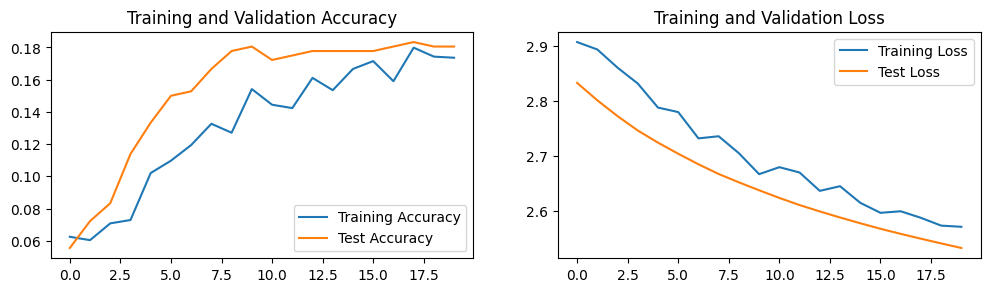

In [82]:
import matplotlib.pyplot as plt
#隐藏警告
import warnings
warnings.filterwarnings("ignore")               #忽略警告信息
plt.rcParams['font.sans-serif']    = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      # 用来正常显示负号
plt.rcParams['figure.dpi']         = 100        #分辨率

epochs_range = range(epochs)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [83]:
best_model.eval()
epoch_test_acc, epoch_test_loss = test(test_dl, best_model, loss_fn)

In [84]:
epoch_test_acc, epoch_test_loss

(0.18333333333333332, 2.5500627557436624)

In [86]:
# 查看是否与我们记录的最高准确率一致
epoch_test_acc

0.18333333333333332